<a href="https://colab.research.google.com/github/BelideSaiTeja/Feature-Selection-Techniques/blob/main/Feature_Selection_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DROPPING FEATURES USING VarianceThreshold**

In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

In [ ]:
import pandas as pd
data = pd.DataFrame({
    'A' : [2, 4, 8, 4, 7],
    'B' : [4, 9, 4, 6, 5],
    'C' : [0, 0, 0, 0, 0],
    'D' : [1, 1, 1, 1, 1],
    'E' : [4, 5, 7, 8, 4]
})

In [ ]:
data

,A,B,C,D,E
0,2,4,0,1,4
1,4,9,0,1,5
2,8,4,0,1,7
3,4,6,0,1,8
4,7,5,0,1,4


**Variance Threshold**


Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for **unsupervised learning**.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True, False, False,  True])

In [ ]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]
print((constant_columns), len(constant_columns))

['C', 'D'] 2


'C', 'D' are the constant columns in this case.

This columns should be removed.


In [ ]:
data.drop(constant_columns, axis = 'columns')

,A,B,E
0,2,4,4
1,4,9,5
2,8,4,7
3,4,6,8
4,7,5,4


In [ ]:
df = pd.read_csv('/content/sample_submission.csv')
df.columns

Index(['ID', 'TARGET'], dtype='object')

**IMPLEMENTATION ON LARGER DATASET**

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [ ]:
df = pd.read_csv('/content/breast-cancer.csv')
df.shape

(569, 32)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = df.drop(['diagnosis'], axis = 'columns')
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
var_thres = VarianceThreshold(threshold = 0.002)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.002)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False])

In [ ]:
sum(var_thres.get_support())

19

19 out of 39 columns have a varience of 0.002

In [ ]:
least_variance_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]
print((least_variance_columns), len(least_variance_columns))

['smoothness_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'fractal_dimension_worst'] 12


In [ ]:
X_train.drop(least_variance_columns, axis = 'columns')
X_test.drop(least_variance_columns, axis = 'columns')

,id,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,radius_se,texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
204,87930,12.47,18.60,81.09,481.9,0.10580,0.08005,0.3961,1.0440,2.497,30.29,14.97,24.64,96.05,677.9,0.2378,0.2671,0.10150,0.3014
70,859575,18.94,21.31,123.60,1130.0,0.10290,0.10800,0.7888,0.7975,5.486,96.05,24.86,26.58,165.90,1866.0,0.2336,0.2687,0.17890,0.2551
131,8670,15.46,19.48,101.70,748.9,0.12230,0.14660,0.4743,0.7859,3.094,48.31,19.26,26.00,124.90,1156.0,0.2394,0.3791,0.15140,0.2837
431,907915,12.40,17.68,81.47,467.8,0.13160,0.07741,0.1767,1.4600,2.204,15.43,12.88,22.91,89.61,515.8,0.2629,0.2403,0.07370,0.2556
540,921385,11.54,14.44,74.65,402.9,0.11200,0.06737,0.2784,1.7680,1.628,20.86,12.26,19.68,78.78,457.8,0.2118,0.1797,0.06918,0.2329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,913102,14.64,16.85,94.21,666.0,0.06698,0.05192,0.2204,1.0060,1.471,19.98,16.46,25.44,106.00,831.0,0.2070,0.2437,0.07828,0.2455
75,8610404,16.07,19.65,104.10,817.7,0.08424,0.09769,0.7474,1.0160,5.029,79.25,19.77,24.56,128.80,1223.0,0.2045,0.2829,0.15200,0.2650
249,884689,11.52,14.93,73.87,406.3,0.07808,0.04328,0.2562,1.0380,1.686,18.62,12.65,21.19,80.88,491.8,0.1582,0.1804,0.09608,0.2664
238,883270,14.22,27.85,92.55,623.9,0.10390,0.11030,0.3354,2.3240,2.105,29.96,15.75,40.54,102.50,764.0,0.2426,0.3064,0.08219,0.1890


**DROPPING FEATURES USING Pearson Correlation**

In this step we will be removing the features which are highly correlated.

The independent features which are highly correlated to each other can mimic as duplicate to each other. So this type of features only any one feature is considered.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/heart_disease_data.csv')
df.dtypes

ï»¿age        int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.head()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = df.drop(['target'], axis = 'columns')
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [ ]:
X_train.corr()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
ï»¿age,1.000000,-0.069144,-0.081551,0.269973,0.216288,0.147255,-0.116987,-0.433163,0.112109,0.216470,-0.175307,0.275725,0.060193
sex,-0.069144,1.000000,-0.056289,-0.021872,-0.198774,0.010664,-0.114318,-0.073321,0.133298,0.174987,-0.085727,0.157654,0.235735
cp,-0.081551,-0.056289,1.000000,0.044423,-0.082496,0.132647,0.057450,0.337541,-0.383637,-0.128422,0.109702,-0.181636,-0.140373
trestbps,0.269973,-0.021872,0.044423,1.000000,0.098508,0.217841,-0.065394,-0.051385,0.053819,0.159873,-0.067435,0.079113,0.079559
chol,0.216288,-0.198774,-0.082496,0.098508,1.000000,0.034586,-0.144160,-0.017247,0.073008,0.104274,-0.024450,0.082633,0.102422
fbs,0.147255,0.010664,0.132647,0.217841,0.034586,1.000000,-0.125162,-0.021315,-0.039216,-0.030297,-0.022323,0.121099,-0.046360
restecg,-0.116987,-0.114318,0.057450,-0.065394,-0.144160,-0.125162,1.000000,0.042493,-0.109918,-0.043575,0.059979,-0.102744,0.019137
thalach,-0.433163,-0.073321,0.337541,-0.051385,-0.017247,-0.021315,0.042493,1.000000,-0.399612,-0.353155,0.374334,-0.211238,-0.131815
exang,0.112109,0.133298,-0.383637,0.053819,0.073008,-0.039216,-0.109918,-0.399612,1.000000,0.306525,-0.233199,0.118781,0.261603
oldpeak,0.216470,0.174987,-0.128422,0.159873,0.104274,-0.030297,-0.043575,-0.353155,0.306525,1.000000,-0.553059,0.216592,0.231605


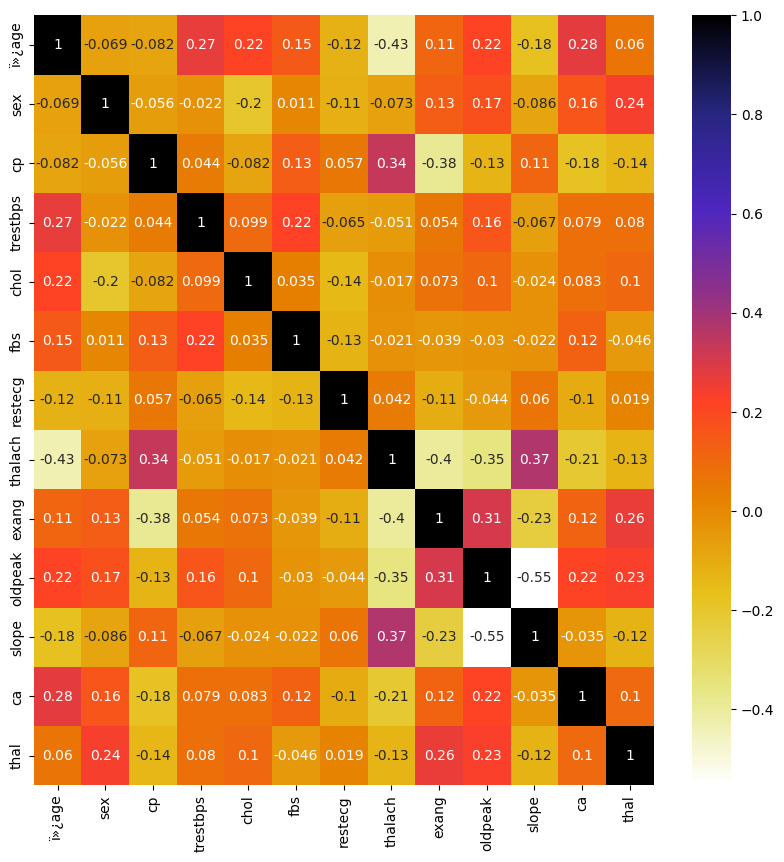

In [ ]:
import seaborn as sns
plt.figure(figsize = (10, 10))
corr = X_train.corr()
sns.heatmap(corr, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [ ]:
X_train

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # negative correlated features are also removed
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.3)     # threshold value considered is 0.3
len(corr_features)

4

In [ ]:
corr_features

{'exang', 'oldpeak', 'slope', 'thalach'}

correlation is checked only for train data and same colums will be deleted in test data to prevent overfitting.

In [ ]:
X_train.drop(corr_features, axis = 'columns')
X_test.drop(corr_features, axis = 'columns')

**Select Features Using INFORMATION GAIN For Classification**

**Mutual Information**

MI Estimate mutual information for a **discrete target variable**.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df['Wine'].unique()

array([1, 2, 3])

In [ ]:
df.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [ ]:
X = df.drop(['Wine'], axis = 'columns')
y = df['Wine']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.44855445, 0.26423458, 0.07439456, 0.23355543, 0.2067873 ,
       0.38136511, 0.70729937, 0.11916251, 0.27199545, 0.57064931,
       0.56054979, 0.50307776, 0.55592951])

There won't be negative values. It will be in range of 0 to 1

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Flavanoids              0.707299
Color.int               0.570649
Hue                     0.560550
Proline                 0.555930
OD                      0.503078
Alcohol                 0.448554
Phenols                 0.381365
Proanth                 0.271995
Malic.acid              0.264235
Acl                     0.233555
Mg                      0.206787
Nonflavanoid.phenols    0.119163
Ash                     0.074395
dtype: float64

<Axes: >

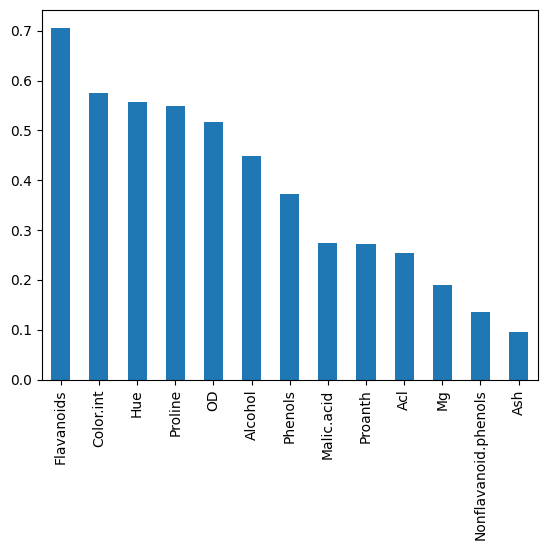

In [ ]:
mutual_info.sort_values(ascending = False).plot.bar()

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
sel_ten_cols = SelectKBest(mutual_info_classif, k = 10)
sel_ten_cols.fit(X_train, y_train)
X_train.columns[sel_ten_cols.get_support()]

Index(['Alcohol', 'Malic.acid', 'Mg', 'Phenols', 'Flavanoids', 'Proanth',
       'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

**Difference Between Information Gain And Mutual Information**

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

**Comparion of Univariate And Mutual Information**

Comparison of F-test and mutual information

[https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py]

**Feature Selection-Information gain - mutual information In Regression**

**Mutual Information**

Estimate mutual information for a **continuous target variable**.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Adv House Price Prediction.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(df.select_dtypes(include=numeric_lst).columns)

In [ ]:
df = df[numerical_cols]
df.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [ ]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df = df.drop('Id', axis = 'columns')

In [ ]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
X = df.drop('SalePrice', axis = 'columns')
y = df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

(1168, 36)

In [ ]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      199
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         6
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       63
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.28887375, 0.18931507, 0.14820832, 0.56345628, 0.11560817,
       0.34457924, 0.25512734, 0.09307646, 0.15175329, 0.01641951,
       0.12577519, 0.36980319, 0.30570062, 0.20307295, 0.00294901,
       0.48816116, 0.03129995, 0.016331  , 0.25866983, 0.07338953,
       0.08119405, 0.0343542 , 0.19844731, 0.19039923, 0.27956135,
       0.38329853, 0.38120868, 0.10160517, 0.14284915, 0.02358416,
       0.        , 0.01870044, 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

OverallQual      0.563456
GrLivArea        0.488161
GarageCars       0.383299
GarageArea       0.381209
TotalBsmtSF      0.369803
YearBuilt        0.344579
1stFlrSF         0.305701
MSSubClass       0.288874
GarageYrBlt      0.279561
FullBath         0.258670
YearRemodAdd     0.255127
2ndFlrSF         0.203073
TotRmsAbvGrd     0.198447
Fireplaces       0.190399
LotFrontage      0.189315
BsmtFinSF1       0.151753
LotArea          0.148208
OpenPorchSF      0.142849
BsmtUnfSF        0.125775
OverallCond      0.115608
WoodDeckSF       0.101605
MasVnrArea       0.093076
BedroomAbvGr     0.081194
HalfBath         0.073390
KitchenAbvGr     0.034354
BsmtFullBath     0.031300
EnclosedPorch    0.023584
ScreenPorch      0.018700
BsmtFinSF2       0.016420
BsmtHalfBath     0.016331
LowQualFinSF     0.002949
3SsnPorch        0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
dtype: float64

<Axes: >

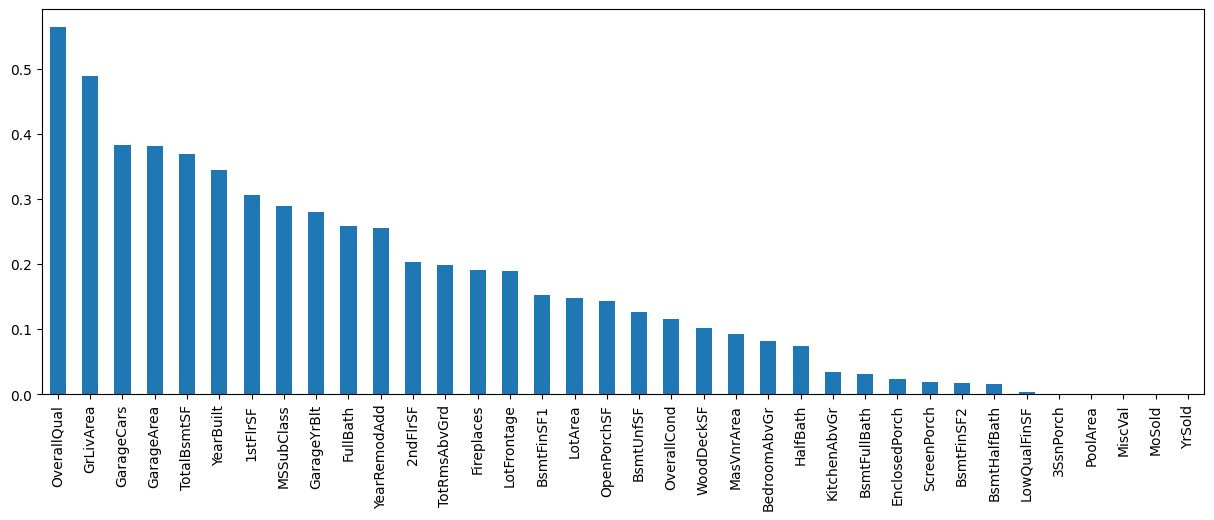

In [ ]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (15,5))

In [ ]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile = 20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7f3fb823b370>)

In [ ]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

**Difference Between Information Gain And Mutual Information**

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

**Feature Selection Using Chi2 Statistical Analysis**

::Compute chi-squared stats between each **non-negative feature and class (target).**

This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [30]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [33]:
# ['sex', 'embarked', 'alone', 'pclass', 'survived']

df = df[['sex', 'embarked', 'alone', 'pclass', 'survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [34]:
df.describe(include = ['object', 'bool'])

,sex,embarked,alone
count,891,889,891
unique,2,3,2
top,male,S,True
freq,577,644,537


In [35]:
import numpy as np
df['sex'] = np.where(df['sex'] == 'male', 1, 0)
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)
df['alone'] = np.where(df['alone'] == True, 1, 0)

In [36]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sex       891 non-null    int64
 1   embarked  891 non-null    int64
 2   alone     891 non-null    int64
 3   pclass    891 non-null    int64
 4   survived  891 non-null    int64
dtypes: int64(5)
memory usage: 34.9 KB


In [38]:
X = df.drop('survived', axis = 'columns')
y = df['survived']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [40]:
X_train['sex'].nunique()

2

In [41]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

**Performing Chi square test**

In [42]:
### perform chi2 test
## it will return two values
# Fscore and pvalue
from sklearn.feature_selection import chi2
f_p_values = chi2(X_train, y_train)

In [43]:
f_p_values

(array([79.43167083,  7.57930827, 13.11264734, 25.00741613]),
 array([4.99194490e-19, 5.90420931e-03, 2.93308916e-04, 5.71102250e-07]))

Higher the Fscore --> important is the feature

Lesser is the pvalue --> important is the feature

In [45]:
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values

sex         4.991945e-19
embarked    5.904209e-03
alone       2.933089e-04
pclass      5.711023e-07
dtype: float64

In [46]:
p_values.sort_index(ascending = False)

sex         4.991945e-19
pclass      5.711023e-07
embarked    5.904209e-03
alone       2.933089e-04
dtype: float64

'sex' column is more important feature as it has less p value in predicting the survived dependent variable.

In [47]:
f_values = pd.Series(f_p_values[0])
f_values.index = X_train.columns
f_values

sex         79.431671
embarked     7.579308
alone       13.112647
pclass      25.007416
dtype: float64

In [49]:
f_values.sort_index(ascending = False)

sex         79.431671
pclass      25.007416
embarked     7.579308
alone       13.112647
dtype: float64


'sex' column is more important feature as it has high f value in predicting the survived dependent variable.